In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/Merged_validation_set.xlsx")
data.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits
0,0062M00000oPjv7QAC,2022-03-04 16:52:21,2022-03-07,Fidler Machine & Repair-Renewal Deal-03042022,0062M00000mgCZHQA2,Other,100.00,0.80,712.0,1.0,...,0.0,NaN,14900.00,NaN,Services,"75 - Automotive Repair, Services, and Parking",0.00,NaN,-0.334307,0.232447
1,0062M00000oBlSXQA0,2022-02-15 21:17:05,2022-02-17,"Law Offices of Mitchell Lee Goldfield, Esq.-Re...",0062M00000nXCpOQAW,Other,100.00,0.68,606.0,5.0,...,0.0,NaN,9247.85,NaN,Services,81 - Legal Services,0.00,NaN,-0.730462,0.971875
2,0062M00000oPQnBQAW,2022-03-01 17:42:32,2022-03-02,Discount Legal Plan-Renewal Deal-03012022,0062M00000nXGa6QAG,Default,100.00,1.09,675.0,6.0,...,0.0,NaN,19866.71,NaN,Services,81 - Legal Services,0.00,NaN,-1.462022,0.011007
3,0062M00000oPeEyQAK,2022-03-03 17:03:57,2022-03-07,Cojo Logistics-New Deal-03032022,0062M00000nXGXHQA4,Other,NaN,NaN,564.0,3.0,...,0.0,NaN,5676.40,NaN,Transportation & Public Utilities,42 - Motor Freight Transportation and Warehousing,0.00,NaN,0.425029,0.115914
4,0062M00000oBRjEQAW,2022-02-11 19:18:03,2022-02-16,Lala Restaurant-Renewal Deal-02112022,0062M00000nXI3iQAG,Default,98.82,0.99,462.0,2.0,...,0.0,NaN,115.79,NaN,Services,90 - Restaurants & Bars,1.25,2.0,-0.718831,0.015512


In [4]:
data.shape

(489, 45)

In [5]:
data['ActiveDeal_YN'].value_counts()

0.0     488
88.0      1
Name: ActiveDeal_YN, dtype: int64

In [6]:
data[data['ActiveDeal_YN']==88].index

Int64Index([488], dtype='int64')

In [7]:
data.drop(index=[488], inplace = True)

In [9]:
data['ActiveDeal_YN'].value_counts()

0.0    488
Name: ActiveDeal_YN, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   OpportunityID                          488 non-null    object        
 1   CreatedDate                            488 non-null    datetime64[ns]
 2   FundedDate                             488 non-null    datetime64[ns]
 3   OpportunityName                        488 non-null    object        
 4   Priordeal_OppID                        488 non-null    object        
 5   Renewal_PreviousCollectionStatus       488 non-null    object        
 6   Renewal_PreviousPace                   478 non-null    float64       
 7   Renewal_PreviousPaidPercentageOfRTR    477 non-null    float64       
 8   Renewal_PreviousCreditScore            475 non-null    float64       
 9   Renewal_CountPreviousDeals             488 non-null    float64   

In [11]:
data.describe()

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,...,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits
count,478.000000,477.000000,475.000000,488.000000,488.000000,488.000000,488.000000,166.000000,4.470000e+02,447.000000,...,488.000000,488.0,488.000000,156.000000,440.000000,115.000000,486.000000,236.000000,444.000000,486.000000
mean,98.088808,0.742117,564.107368,2.393443,3.862705,2.012295,24.245000,13.721145,6.274360e+04,12325.276465,...,0.131148,0.0,0.319672,10380.408013,14078.999909,8028.680174,0.527606,1.228814,-0.154360,0.249885
std,7.885228,0.276527,153.260344,2.023709,9.896362,1.229285,36.476691,18.831993,1.824920e+05,34409.865613,...,0.337908,0.0,0.466828,40131.270263,48786.954672,21799.292661,1.597865,2.924325,2.770894,0.510255
min,10.040000,0.070000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000e+02,-686.670000,...,0.000000,0.0,0.000000,0.000000,-25564.830000,0.000000,0.000000,0.000000,-56.591706,-0.129560
25%,100.000000,0.530000,545.000000,1.000000,0.000000,1.000000,11.585000,0.000000,1.518583e+04,1664.810000,...,0.000000,0.0,0.000000,1596.582500,1878.135000,714.340000,0.000000,0.000000,-0.129446,0.056949
50%,100.000000,0.650000,595.000000,2.000000,0.000000,2.000000,18.335000,3.500000,2.531035e+04,3507.840000,...,0.000000,0.0,0.000000,3690.560000,5719.000000,3605.400000,0.000000,0.000000,0.040478,0.120260
75%,100.000000,0.950000,634.500000,3.000000,3.000000,3.000000,27.755000,24.750000,4.806278e+04,7950.875000,...,0.000000,0.0,1.000000,8698.705000,10971.987500,8809.080000,0.250000,1.000000,0.242582,0.229658
max,100.000000,2.130000,807.000000,12.000000,90.000000,10.000000,686.870000,97.000000,3.162730e+06,376602.010000,...,1.000000,0.0,1.000000,449342.670000,792342.670000,221726.190000,14.250000,20.000000,0.958528,5.978911


# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [12]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 38 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'NewDeal_YN',
       'ActiveDeal_YN', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMon

# Dropped the unwanted features

#### Attributes to be used later but not the part of the training -
*  'FundedWriteOffAmount_Gross', 'FundedWriteOffAmount_Net(NetWO)', 
*  'Renewal_PreviousHBwoLCF'
*  'Renewal_PreviousHBwLCF'

In [13]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate',
                   'Industry',       
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'BankStatement_Sum_NumReturnItems',
                   'LastBankStatement_OverdraftDays',
                   'BBC_Position__c',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF'], axis=1)


In [14]:
data.shape

(488, 29)

In [15]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 27 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'BankStatement_MA_OverdraftDays', 'BankStatement_MA_NumReturnItems',
       'Credit_Score__c', 'Time_in_Business__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits'],
      dtype='object')


Categorical_attributes : 2 

Index(['OpportunityID', 'Is_this_Business_home_based__c'], dtype='object')


###  Observations

* Some attributes name updated, like -
   - FundedWriteOffAmount_Net = NetWO
   - AvgMonthRevenue = AvgMonthlydeposits                        
   - AvgDailyBalance = AvgDailybalance
   - Avg_ReturnItemsDays = Avg_ReturnItemdays                        
   - Pct change in Month Revenue = PctChangeInReveune
   - PctAvgDailybalance2AvgMonthlyRevenue = PctAvgDailybalance2AvgMonthlyDeposits     


* check - WriteOff_YN = should not be any missing values 
* Is_this_Business_home_based__c = Categorical to Numerical 
* Renewal_PreviousPace = remove anomoloies < 50% values 
* Time_in_Business__c = check and drop negative values  

### New added columns for decile analysis
* Paybackamount
* WOGross_AdvanceBalance

In [16]:
# check %_of_missing_values
data.isnull().sum().sort_values(ascending = False)/len(data)*100

NetWO                                    76.434426
FundedWriteOffAmount_Gross               68.032787
LatestMonth_ReturnItemDays               51.639344
WOGross_AdvanceBalance                    9.836066
PctChangeInReveune                        9.016393
Renewal_PreviousAvgMonthRevenue           8.401639
Renewal_PreviousAvgDailyBalance           8.401639
Renewal_PreviousPaidPercentageOfRTR       2.254098
Renewal_PreviousPace                      2.049180
Credit_Score__c                           1.844262
BankStatement_MA_NumReturnItems           0.409836
AvgMonthlydeposits                        0.409836
PctAvgDailybalance2AvgMonthlyDeposits     0.409836
BankStatement_MA_OverdraftDays            0.409836
Avg_ReturnItemdays                        0.409836
AvgDailybalance                           0.409836
FundedAmount                              0.000000
WriteOff_YN                               0.000000
Paybackamount                             0.000000
OpportunityID                  

In [17]:
with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_val_Q1.xlsx') as writer:
  data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
  data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
  data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
  data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
  data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
  data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
  data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
  data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
  data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
  data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
  data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
  data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
  data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')
  data[data['WOGross_AdvanceBalance'].isna()].to_excel(writer, sheet_name = 'WOGross_AdvanceBalance')
  

In [18]:
data.corr()['WriteOff_YN']

Renewal_PreviousPace                    -0.046892
Renewal_PreviousPaidPercentageOfRTR     -0.135793
Renewal_CountPreviousDeals              -0.111670
Renewal_PreviousCountBounces             0.039299
Renewal_PreviousPosition                 0.057544
Renewal_PreviousHBwLCF                  -0.031965
Renewal_PreviousAvgMonthRevenue         -0.066242
Renewal_PreviousAvgDailyBalance         -0.081329
Renewal_TwoWeekBounces                   0.123006
NumberOfBankStatements                   0.114150
BankStatement_MA_OverdraftDays          -0.056671
BankStatement_MA_NumReturnItems          0.003016
Credit_Score__c                         -0.048439
Time_in_Business__c                     -0.112204
HB_with_LCF_Payment__c                  -0.029106
AvgMonthlydeposits                       0.018140
AvgDailybalance                         -0.067452
FundedAmount                            -0.037250
Paybackamount                           -0.035317
WriteOff_YN                              1.000000


# Tasks to do -

* EDA - 
* -ves, replace it by 0    - WOGross_AdvanceBalance - **Done**
* 1 outlier - remove it - **Done**
* Pace rate - drop it <50%   - Renewal_PreviousPace - **Done**
* check for sir answer - **Done**
* decile analysis on and train data both 
* Contact us - to discuss hyper-parameter tuning

# WriteOff_YN

In [19]:
data['WriteOff_YN'].isna().sum()

0

In [20]:
data['WriteOff_YN'].value_counts()

0.0    332
1.0    156
Name: WriteOff_YN, dtype: int64

In [21]:
print("basic skewness idea: ", 332/156)

basic skewness idea:  2.128205128205128


In [22]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  68 %
Percenatge of writeoff_deal:  32 %


# Is_this_Business_home_based__c

In [23]:
data = pd.get_dummies(data,columns = ['Is_this_Business_home_based__c'],drop_first= True)

# Renewal_PreviousPace

In [24]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

3     NaN
8     NaN
13    NaN
16    NaN
122   NaN
124   NaN
265   NaN
283   NaN
409   NaN
448   NaN
Name: Renewal_PreviousPace, dtype: float64

In [25]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID
39,10.04,0.0,0062M00000o9rEEQAY
446,23.22,1.0,0062M00000oBctkQAC


In [26]:
data.drop(index=[39, 446], inplace = True)

In [27]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [28]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [29]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [30]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

7        -35.00
14      -387.40
18      -665.00
33     -6234.95
67     -1208.81
75    -16475.00
81     -7998.77
108     -134.33
116      -35.00
118     -105.00
120     -725.56
141    -2287.05
143    -3515.00
165      -35.00
180      -35.00
194    -2500.00
209    -5914.13
225      -35.00
227      -35.00
231   -25564.83
244    -9864.37
246      -70.00
247    -2256.33
263    -2109.41
280     -105.00
302     -799.93
303    -2780.00
304    -2640.00
307    -2920.00
308      -35.00
317    -2500.00
318    -3682.00
321    -6441.39
335    -2640.00
344    -1398.44
359    -3296.45
371    -1433.02
373    -2511.47
389      -70.00
402      -35.00
409    -3142.96
432    -2640.00
454      -35.00
460      -70.00
480    -2815.00
Name: WOGross_AdvanceBalance, dtype: float64

In [31]:
len(data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance'])

45

In [32]:
data[data['WOGross_AdvanceBalance'] < 0]["WOGross_AdvanceBalance"]

7        -35.00
14      -387.40
18      -665.00
33     -6234.95
67     -1208.81
75    -16475.00
81     -7998.77
108     -134.33
116      -35.00
118     -105.00
120     -725.56
141    -2287.05
143    -3515.00
165      -35.00
180      -35.00
194    -2500.00
209    -5914.13
225      -35.00
227      -35.00
231   -25564.83
244    -9864.37
246      -70.00
247    -2256.33
263    -2109.41
280     -105.00
302     -799.93
303    -2780.00
304    -2640.00
307    -2920.00
308      -35.00
317    -2500.00
318    -3682.00
321    -6441.39
335    -2640.00
344    -1398.44
359    -3296.45
371    -1433.02
373    -2511.47
389      -70.00
402      -35.00
409    -3142.96
432    -2640.00
454      -35.00
460      -70.00
480    -2815.00
Name: WOGross_AdvanceBalance, dtype: float64

In [33]:
# replacing -ve values with zeros
data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [34]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [35]:
data['WOGross_AdvanceBalance']

0      14900.00
1       9247.85
2      19866.71
3       5676.40
4        115.79
         ...   
483     4880.90
484     3724.95
485         NaN
486     4947.50
487        0.25
Name: WOGross_AdvanceBalance, Length: 486, dtype: float64

In [36]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    75
1.0     2
Name: WriteOff_YN, dtype: int64

In [37]:
data["WOGross_AdvanceBalance"].describe()

count       438.000000
mean      14429.246256
std       48773.455514
min           0.000000
25%        1880.622500
50%        5724.855000
75%       10983.162500
max      792342.670000
Name: WOGross_AdvanceBalance, dtype: float64

In [38]:
data[data["WOGross_AdvanceBalance"] > 3379]["WriteOff_YN"].value_counts()

0.0    151
1.0    130
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [39]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

,OpportunityID,WOGross_AdvanceBalance,WriteOff_YN
354,0062M00000oPA4zQAG,0.0,1.0
423,0062M00000o91XtQAI,0.0,1.0


In [40]:
data.drop(index=[354,  423], inplace = True)

In [41]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)]


,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Paybackamount,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,Is_this_Business_home_based__c_Yes


In [42]:
#CHECKING MISSING VALUES IN ADVANCE_WOS
data["WOGross_AdvanceBalance"].fillna(0, inplace = True)

In [43]:
data["WOGross_AdvanceBalance"].isnull().sum()

0

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BBC_Position__c - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [44]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance', 'NetWO',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'Is_this_Business_home_based__c_Yes'],
      dtype='object')

In [49]:
print('Checking Missing Values -')
print('\n')
print('NumberOfBankStatements :', data['NumberOfBankStatements'].isna().sum())
print('Renewal_PreviousAvgDailyBalance :', data['Renewal_PreviousAvgDailyBalance'].isna().sum())
print('Renewal_PreviousAvgMonthRevenue :', data['Renewal_PreviousAvgMonthRevenue'].isna().sum())
print('AvgMonthlydeposits :' ,data['AvgMonthlydeposits'].isna().sum())          
print('AvgDailybalance :' ,data['AvgDailybalance'].isna().sum())
print('BankStatement_MA_NumReturnItems :', data['BankStatement_MA_NumReturnItems'].isna().sum())
print('BankStatement_MA_OverdraftDays :' ,data['BankStatement_MA_OverdraftDays'].isna().sum())
print('Avg_ReturnItemdays :', data['Avg_ReturnItemdays'].isna().sum())
print('PctChangeInReveune :' ,data['PctChangeInReveune'].isna().sum())
print('PctAvgDailybalance2AvgMonthlyDeposits :', data['PctAvgDailybalance2AvgMonthlyDeposits'].isna().sum())

Checking Missing Values -


NumberOfBankStatements : 0
Renewal_PreviousAvgDailyBalance : 40
Renewal_PreviousAvgMonthRevenue : 40
AvgMonthlydeposits : 2
AvgDailybalance : 2
BankStatement_MA_NumReturnItems : 2
BankStatement_MA_OverdraftDays : 2
Avg_ReturnItemdays : 2
PctChangeInReveune : 43
PctAvgDailybalance2AvgMonthlyDeposits : 2


In [50]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    474.000000
mean      98.468207
std        5.809048
min       54.550000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    422
95.23       1
59.05       1
79.50       1
83.33       1
75.11       1
91.65       1
95.65       1
95.96       1
96.30       1
69.03       1
86.05       1
86.79       1
97.44       1
95.27       1
91.89       1
72.90       1
94.38       1
76.32       1
98.33       1
54.55       1
77.26       1
98.48       1
93.34       1
90.81       1
95.93       1
95.55       1
98.82       1
90.00       1
98.59       1
92.16       1
69.32       1
91.18       1
69.84       1
88.89       1
93.75       1
84.45       1
85.00       1
91.16       1
93.33       1
90.40       1
72.64       1
93.94       1
87.80       1
82.35       1
86.08       1
95.37       1
60.04       1
70.59       1
99.34       

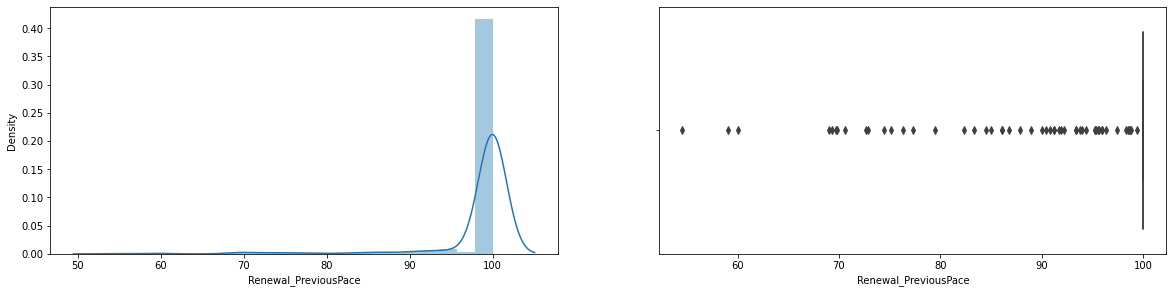

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    473.000000
mean       0.744101
std        0.274717
min        0.070000
25%        0.530000
50%        0.650000
75%        0.950000
max        2.130000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

0.52    31
1.00    31
0.51    24
0.56    21
0.60    19
        ..
1.38     1
0.47     1
0.07     1
1.40     1
1.58     1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 103, dtype: int64 

Unique number of attribute : 

[0.8  0.68 1.09  nan 0.99 0.42 0.47 0.5  0.55 1.   1.38 0.69 0.78 0.9
 1.03 1.18 0.87 0.81 0.54 0.6  0.73 0.56 0.98 0.53 0.15 0.24 0.63 0.7
 0.67 0.95 1.26 0.92 1.05 1.15 1.17 1.43 2.13 2.   1.2  0.65 0.49 1.27
 1.13 0.86 0.58 0.93 0.52 1.33 1.25 0.84 0.91 0.74 0.89 1.02 0.75 0.76
 0.64 1.01 0.51 1.22 1.23 0.82 1.1  0.94 0.61 0.83 0.97 0.28 0.77 0.62
 0.43 1.35 1.46 0.39 0.88 0.57 0.35 0.85 0.07 0.59 0.66 1.4  0.79 0.37
 1.08 0.96 1.16 1.04 

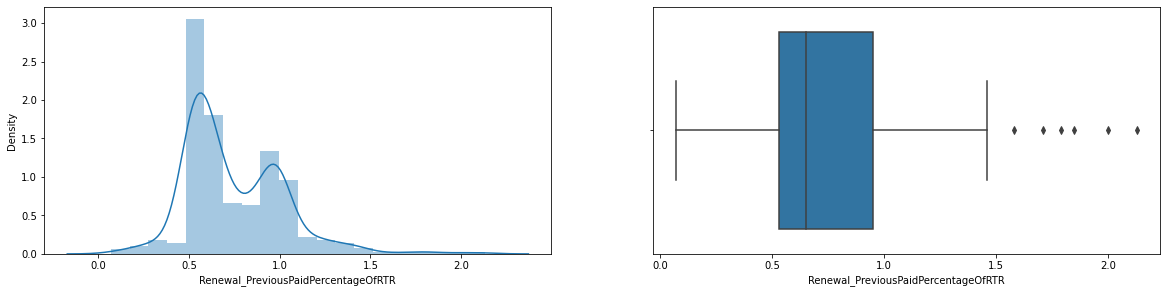

attribute_name : Renewal_CountPreviousDeals
Description of attribute : 

count    484.000000
mean       2.396694
std        2.029714
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: Renewal_CountPreviousDeals, dtype: float64 

Value counts of attribute : 

1.0     229
2.0     106
3.0      55
4.0      27
5.0      20
6.0      19
7.0      14
8.0       6
12.0      3
9.0       2
11.0      2
10.0      1
Name: Renewal_CountPreviousDeals, dtype: int64 

Unique number of attribute : 

[ 1.  5.  6.  3.  2.  7.  4.  9.  8. 12. 11. 10.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



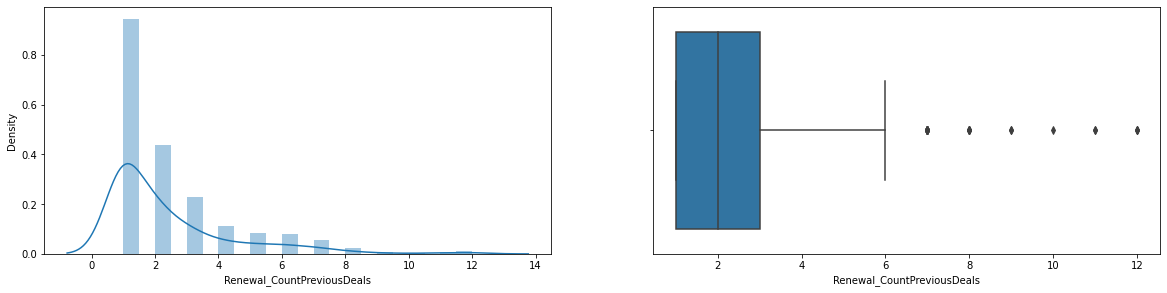

attribute_name : Renewal_PreviousCountBounces
Description of attribute : 

count    484.000000
mean       3.811983
std        9.893626
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       90.000000
Name: Renewal_PreviousCountBounces, dtype: float64 

Value counts of attribute : 

0.0     292
1.0      42
2.0      25
4.0      21
3.0      19
6.0      10
12.0      6
8.0       6
14.0      6
5.0       6
9.0       4
7.0       4
16.0      4
11.0      4
17.0      3
45.0      3
10.0      2
41.0      2
27.0      2
26.0      2
18.0      2
23.0      2
31.0      2
30.0      2
79.0      1
38.0      1
22.0      1
29.0      1
60.0      1
20.0      1
21.0      1
62.0      1
44.0      1
37.0      1
90.0      1
13.0      1
33.0      1
Name: Renewal_PreviousCountBounces, dtype: int64 

Unique number of attribute : 

[ 1.  0. 14.  5.  3. 11.  8.  4.  6.  9. 45. 13. 90. 37. 18. 27. 44. 41.
 12.  2. 17. 26. 20. 23. 16.  7. 62. 21. 30. 79. 60. 29. 10. 22. 31. 38.
 33.] 

Mi

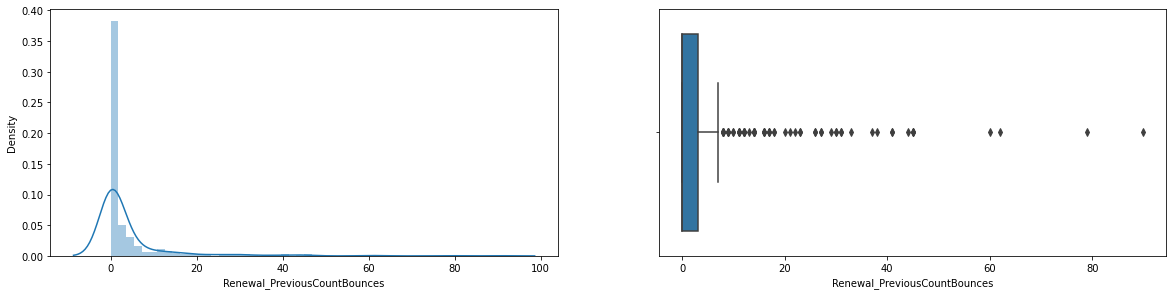

attribute_name : Renewal_PreviousPosition
Description of attribute : 

count    484.000000
mean       1.993802
std        1.189134
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Renewal_PreviousPosition, dtype: float64 

Value counts of attribute : 

1.0     211
2.0     146
3.0      73
4.0      37
5.0      14
7.0       1
10.0      1
8.0       1
Name: Renewal_PreviousPosition, dtype: int64 

Unique number of attribute : 

[ 7.  1. 10.  3.  2.  4.  5.  8.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



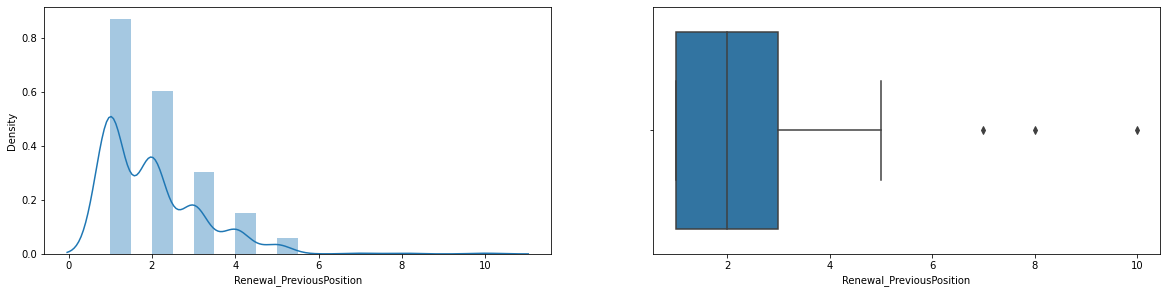

attribute_name : Renewal_PreviousHBwLCF
Description of attribute : 

count    484.000000
mean      24.375248
std       36.595006
min        0.000000
25%       11.675000
50%       18.445000
75%       27.865000
max      686.870000
Name: Renewal_PreviousHBwLCF, dtype: float64 

Value counts of attribute : 

0.00     26
3.77      2
14.94     2
25.73     2
25.67     2
         ..
17.45     1
53.48     1
8.28      1
5.45      1
20.85     1
Name: Renewal_PreviousHBwLCF, Length: 443, dtype: int64 

Unique number of attribute : 

[118.64  16.26  11.01  20.61  16.11   0.     9.97  19.73  27.19  14.07
  10.53   8.22  13.77  23.82   7.11  25.65  49.53  25.72  24.24   8.37
  29.89  37.    20.11  46.46  14.46  21.83  48.78  13.87  21.78  22.36
   8.53   8.01  15.25  17.79   8.11  20.79   7.35  54.3   25.46  18.51
  16.83  20.01  14.91  11.29  12.24  15.28  12.37  42.24  31.38   9.28
  22.67  16.59  29.39  28.68   8.65  17.58  24.91  25.7   25.79  19.2
   6.51  16.28  24.92  17.21  24.79  45.96  35.1

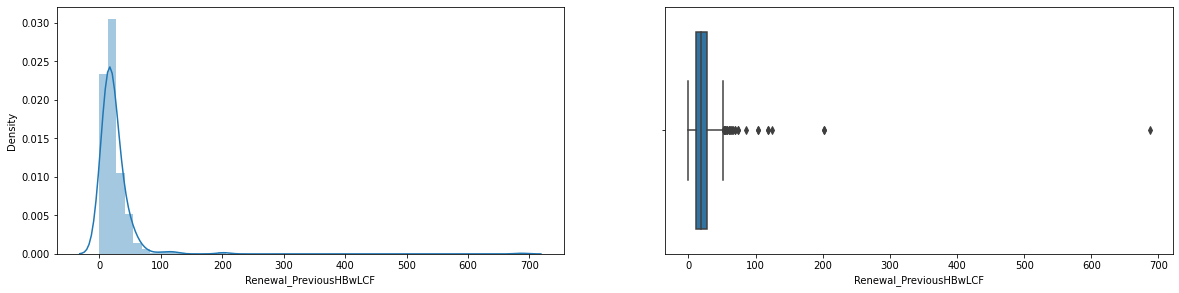

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    4.440000e+02
mean     6.182553e+04
std      1.823386e+05
min      6.000000e+02
25%      1.517303e+04
50%      2.524420e+04
75%      4.694799e+04
max      3.162730e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

56142.61     1
32638.30     1
32772.59     1
11795.37     1
14478.08     1
            ..
21142.16     1
108976.26    1
29514.42     1
9983.37      1
16874.02     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 444, dtype: int64 

Unique number of attribute : 

[5.61426100e+04 2.76245000e+04 3.16273000e+06 2.08540500e+04
 2.17980100e+04            nan 5.24545360e+05 1.69161500e+04
 1.54920000e+04 2.89837900e+04 5.41909800e+04 3.79464600e+04
 2.30538500e+04 9.28840000e+02 1.62623500e+04 2.38971000e+04
 3.22575000e+04 2.10226200e+04 3.15079700e+04 4.43276300e+04
 1.23127200e+04 1.16240400e+04 4.68524000e+03 2.88614200e+04
 7.16703000e+03 2.00890300e+04 

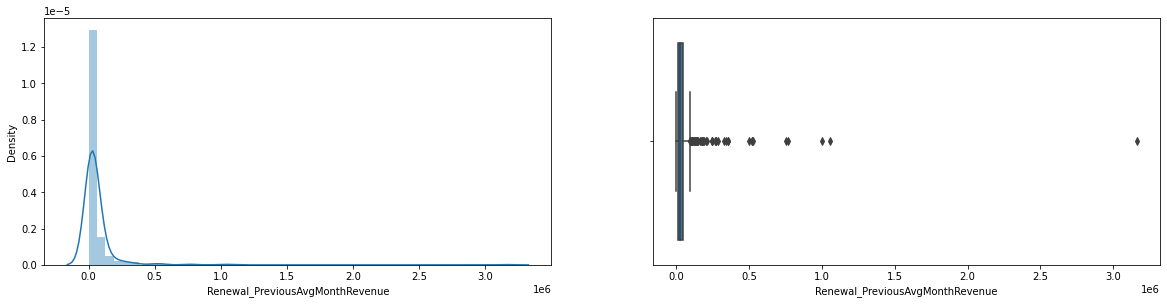

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count       444.000000
mean      12231.393356
std       34489.529131
min        -686.670000
25%        1647.767500
50%        3501.585000
75%        7765.427500
max      376602.010000
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

6899.89     1
12346.05    1
1225.59     1
1680.84     1
2539.48     1
           ..
7780.21     1
30784.87    1
3496.14     1
2252.43     1
1486.01     1
Name: Renewal_PreviousAvgDailyBalance, Length: 444, dtype: int64 

Unique number of attribute : 

[ 6.8998900e+03  1.6924830e+04  5.3529790e+04  4.7587700e+03
  1.7391700e+03            nan  5.5750860e+04  1.9980200e+03
  3.4449000e+03  5.3322000e+02  6.0676000e+02  1.8841800e+03
  2.7125900e+03  7.5840500e+03  1.7435000e+03  7.4843300e+03
  1.4742000e+03  3.5796600e+03  6.4314000e+02  4.8216000e+02
  1.2294900e+03  1.0045800e+03  2.0314900e+03  5.2184000e+02
  5.8952000e+03  6.5767500e+03  1.

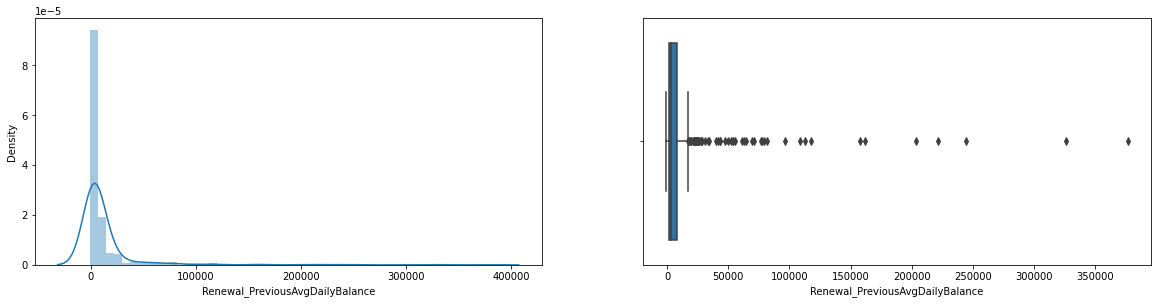

attribute_name : Renewal_TwoWeekBounces
Description of attribute : 

count    484.000000
mean       0.041322
std        0.237192
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Renewal_TwoWeekBounces, dtype: float64 

Value counts of attribute : 

0.0    468
1.0     12
2.0      4
Name: Renewal_TwoWeekBounces, dtype: int64 

Unique number of attribute : 

[0. 2. 1.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



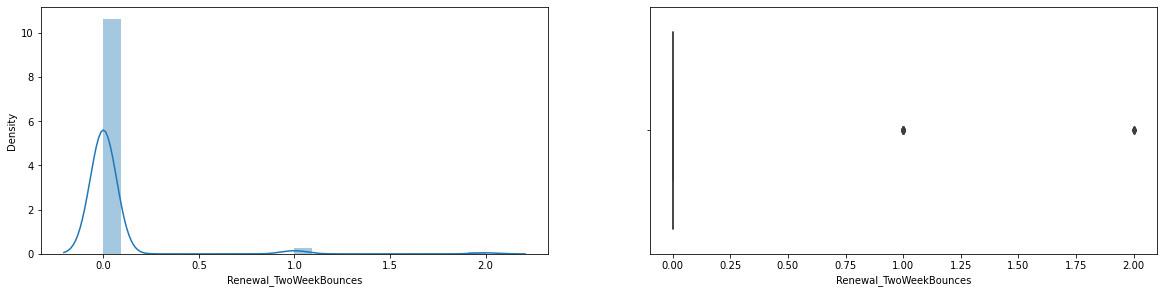

attribute_name : NumberOfBankStatements
Description of attribute : 

count    484.000000
mean       3.489669
std        0.679405
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: NumberOfBankStatements, dtype: float64 

Value counts of attribute : 

4.0    273
3.0    182
2.0     20
1.0      6
0.0      2
5.0      1
Name: NumberOfBankStatements, dtype: int64 

Unique number of attribute : 

[4. 3. 1. 2. 0. 5.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



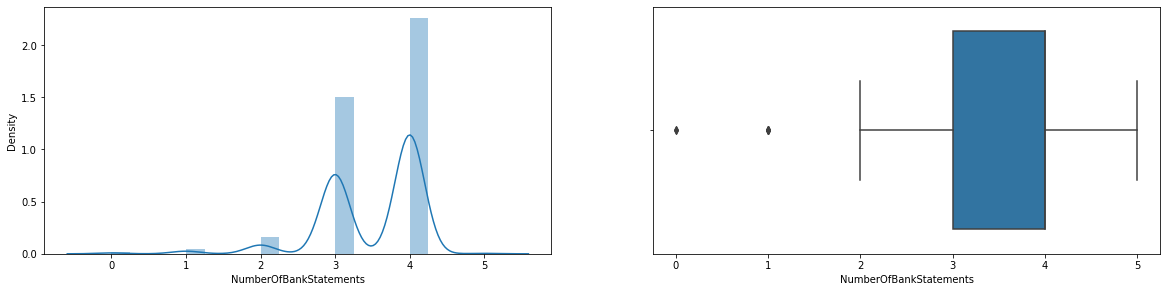

attribute_name : BankStatement_MA_OverdraftDays
Description of attribute : 

count    482.000000
mean       1.940422
std        3.102803
min        0.000000
25%        0.000000
50%        0.500000
75%        2.500000
max       17.333333
Name: BankStatement_MA_OverdraftDays, dtype: float64 

Value counts of attribute : 

0.000000     179
0.250000      31
0.333333      24
1.000000      19
2.000000      16
            ... 
11.666666      1
11.333333      1
7.333333       1
8.666666       1
14.333333      1
Name: BankStatement_MA_OverdraftDays, Length: 69, dtype: int64 

Unique number of attribute : 

[ 0.        0.666666 10.        0.333333  8.666666  0.25     15.5
  1.        5.333333  3.333333  2.        7.333333  2.75      6.
  4.5       1.75      0.5       1.25      2.25      5.25      1.5
  9.666666 11.       11.333333 11.666666 12.        2.5       6.333333
  3.        5.666666  6.75      2.666666 15.75      5.5       6.25
  4.        4.666666  4.75     10.5       0.75     17.333333

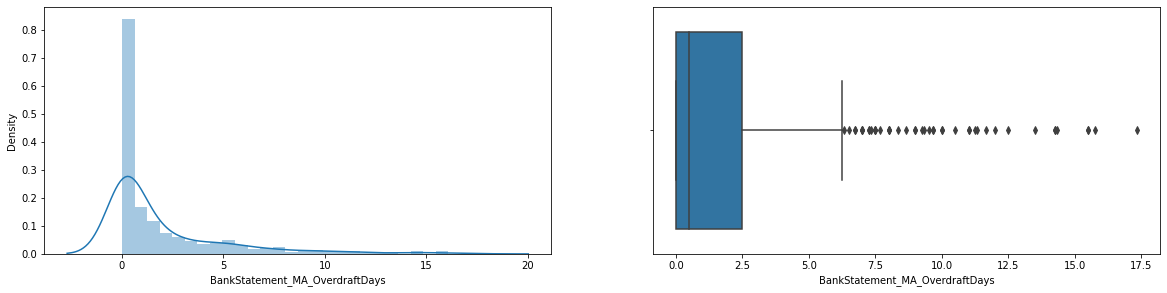

attribute_name : BankStatement_MA_NumReturnItems
Description of attribute : 

count    482.000000
mean       1.119467
std        3.170759
min        0.000000
25%        0.000000
50%        0.000000
75%        0.666666
max       38.500000
Name: BankStatement_MA_NumReturnItems, dtype: float64 

Value counts of attribute : 

0.000000     311
0.250000      20
0.500000      17
0.750000      12
1.500000      10
2.500000       8
2.000000       8
0.333333       8
0.666666       8
1.000000       6
1.250000       5
2.666666       4
4.000000       4
1.750000       4
4.500000       3
1.333333       3
5.000000       3
7.000000       3
3.750000       2
2.250000       2
7.500000       2
3.666666       2
9.000000       2
4.250000       2
6.000000       2
7.750000       2
2.750000       2
1.666666       2
3.000000       2
8.666666       1
11.333333      1
38.500000      1
3.500000       1
6.250000       1
10.333333      1
6.500000       1
8.250000       1
2.333333       1
12.333333      1
13.000000    

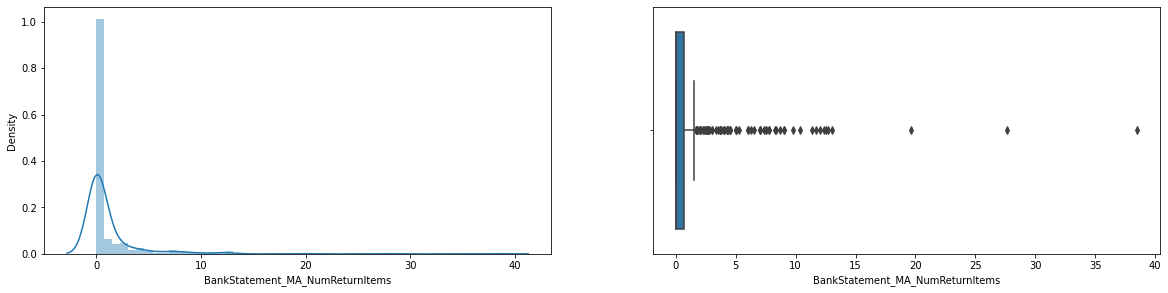

attribute_name : Credit_Score__c
Description of attribute : 

count    475.000000
mean     554.882105
std      162.383651
min        0.000000
25%      544.000000
50%      589.000000
75%      633.500000
max      802.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      25
1.0       8
628.0     7
612.0     7
590.0     6
         ..
531.0     1
802.0     1
596.0     1
505.0     1
711.0     1
Name: Credit_Score__c, Length: 196, dtype: int64 

Unique number of attribute : 

[714.  nan 665.   0. 468. 647. 710. 567. 663. 576. 564. 490. 546. 653.
 511. 586. 606. 544. 553. 581. 585. 550. 560. 547. 529. 633. 575. 611.
 667. 526. 598. 608. 652. 549. 592. 501. 673. 602. 609. 661. 500. 622.
 635. 571. 610. 566. 615. 534. 551. 472. 646. 577. 509. 556. 658. 599.
 624. 554. 659. 589.   1. 705. 669. 668. 573. 563. 480. 612. 543. 761.
 678. 525. 559. 497. 670. 545. 603. 706. 741. 539. 632. 604. 645. 674.
 666. 594. 587. 655. 482. 593. 654. 579. 656. 697. 572. 542. 477. 53

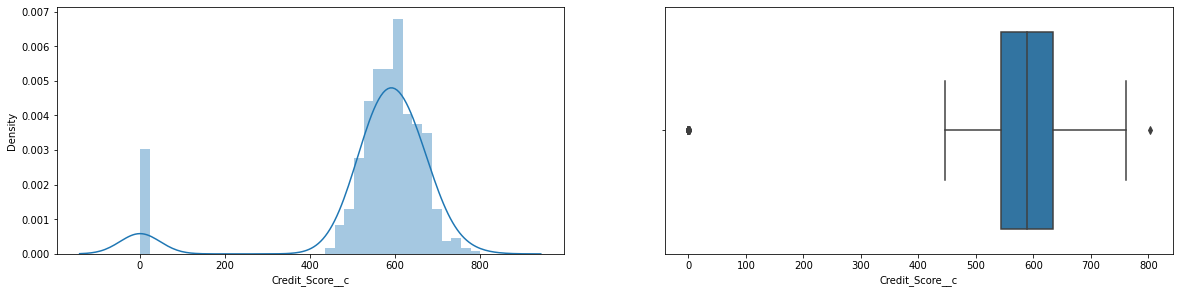

attribute_name : Time_in_Business__c
Description of attribute : 

count    484.000000
mean       6.744587
std        8.889063
min        0.290000
25%        1.760000
50%        3.695000
75%        7.990000
max      100.470000
Name: Time_in_Business__c, dtype: float64 

Value counts of attribute : 

2.21     5
0.97     3
1.45     3
6.71     3
0.88     3
        ..
2.59     1
3.27     1
3.97     1
9.45     1
14.71    1
Name: Time_in_Business__c, Length: 410, dtype: int64 

Unique number of attribute : 

[ 26.95  34.73   6.19   3.41  16.89   8.24   5.88   3.39   3.57   6.57
  10.2    6.56   5.06   1.52   4.31  10.02   4.81   1.05   0.94   2.76
   0.83   5.4    3.99  14.54   9.1    4.41   5.45   1.9    2.73   4.49
  20.46   0.88  19.97  14.11   5.08   2.94   1.45   1.24   0.9    6.75
  37.36   7.    21.12  13.5    3.65   2.12   3.09   7.79   3.31   3.47
   5.36   4.25   1.42   1.97   1.77   3.26   9.4    1.02   6.71   1.18
   1.71   1.33   3.62   0.98   3.12   0.92   1.38   1.16   3.21  14

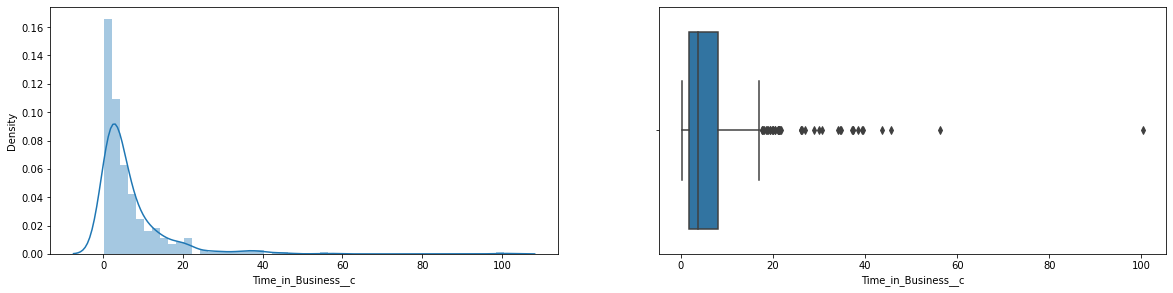

attribute_name : HB_with_LCF_Payment__c
Description of attribute : 

count    484.000000
mean      21.480517
std       28.416452
min        0.000000
25%       11.847500
50%       17.755000
75%       24.915000
max      574.370000
Name: HB_with_LCF_Payment__c, dtype: float64 

Value counts of attribute : 

0.00     6
10.77    3
15.43    3
35.16    2
27.92    2
        ..
11.48    1
6.90     1
11.35    1
31.57    1
20.91    1
Name: HB_with_LCF_Payment__c, Length: 450, dtype: int64 

Unique number of attribute : 

[ 28.42  27.72  14.11   6.57  19.93  11.69   0.    13.51  23.88  15.12
  10.91  13.82  23.28  36.88  19.9   45.99 574.37  11.1   18.05   9.18
   3.05  23.52  17.23  49.63  20.56  40.81  27.61   7.94  17.92  13.02
  17.    62.07  23.89  29.28  16.39  32.5   14.1   19.13   9.7   85.21
  16.63  20.12  34.61   9.51  44.99  12.55   8.72  20.23  12.61  27.52
  10.97   9.31  23.26  12.6   51.52  23.99  33.23  17.12  15.06  14.37
  24.9   13.78  22.38  22.25  10.51  12.07  12.51  29.05  

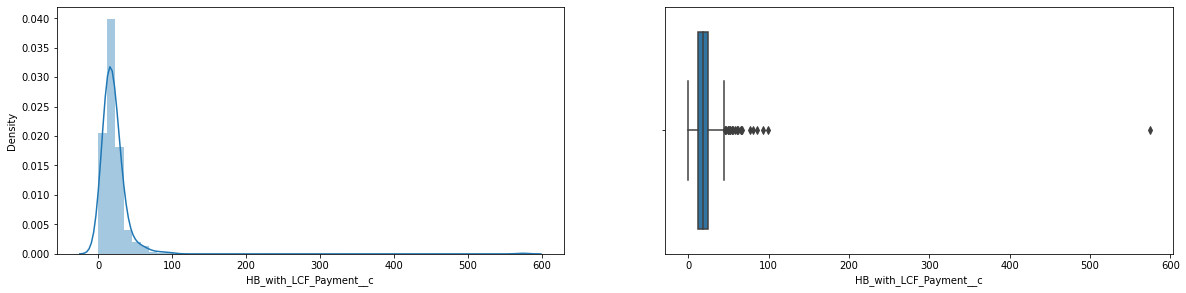

attribute_name : AvgMonthlydeposits
Description of attribute : 

count    4.820000e+02
mean     6.944182e+04
std      1.675961e+05
min      1.220150e+02
25%      1.630252e+04
50%      2.941181e+04
75%      5.581369e+04
max      2.290947e+06
Name: AvgMonthlydeposits, dtype: float64 

Value counts of attribute : 

42076.225000     1
9179.610000      1
57955.242500     1
32205.327500     1
104793.380000    1
                ..
30043.652500     1
11530.752500     1
21609.733333     1
13396.870000     1
9976.396666      1
Name: AvgMonthlydeposits, Length: 482, dtype: int64 

Unique number of attribute : 

[4.20762250e+04 1.59636600e+04 1.28460685e+06 3.62697233e+04
 1.26818850e+04 1.75110987e+05 6.50195917e+05 5.79200267e+04
 2.67944500e+04 3.17965450e+04 5.29984100e+04 2.34249833e+04
 1.51250125e+04 2.05510367e+04 1.57251700e+04 1.43653450e+04
 2.11745467e+04 3.92780000e+04 2.36274800e+04 5.30254500e+04
 5.45426825e+04 1.48801475e+04 2.13683800e+04 6.51829500e+03
 3.01949550e+04 9.89292000

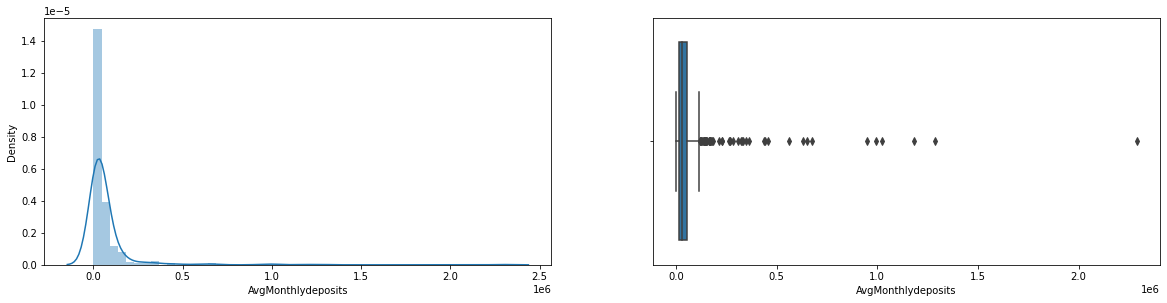

attribute_name : AvgDailybalance
Description of attribute : 

count       482.000000
mean      11963.588473
std       29532.052924
min      -22530.626666
25%        1597.313541
50%        3522.600000
75%        9851.254375
max      272502.616666
Name: AvgDailybalance, dtype: float64 

Value counts of attribute : 

2652.175000     2
9780.505000     1
615.427500      1
12619.912500    1
7395.110000     1
               ..
799.512500      1
17480.002500    1
863.500000      1
2630.976666     1
626.090000      1
Name: AvgDailybalance, Length: 481, dtype: int64 

Unique number of attribute : 

[ 9.78050500e+03  1.55146767e+04  1.41400800e+04  4.20415667e+03
  1.96717500e+02  4.14718467e+04 -2.25306267e+04  1.73093667e+04
  1.50630575e+04 -1.99322500e+02  6.87586666e+02  8.80670000e+02
  1.81288000e+03  1.04496333e+03  5.48806666e+02  1.29242500e+03
  2.95703333e+03  1.64147000e+03  6.38965333e+03  1.84683067e+04
  1.09402250e+03  1.31142500e+03  1.92924667e+03  1.20370750e+03
  7.64300000e+

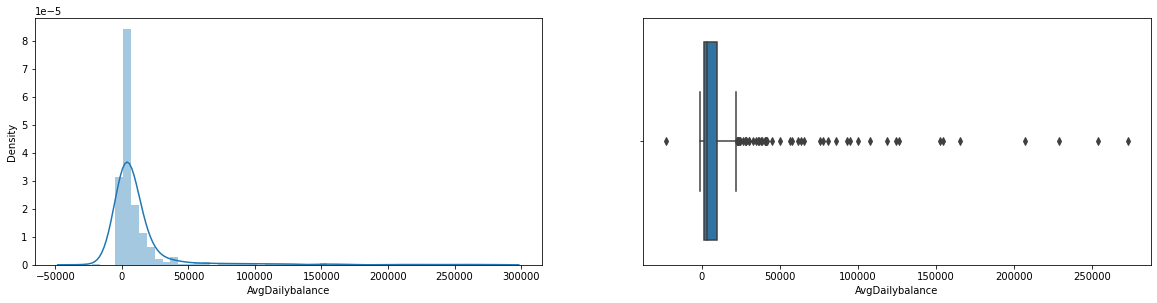

attribute_name : FundedAmount
Description of attribute : 

count    4.840000e+02
mean     2.905661e+04
std      9.603511e+04
min      3.000000e+03
25%      7.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.500000e+06
Name: FundedAmount, dtype: float64 

Value counts of attribute : 

10000.0    54
15000.0    36
20000.0    32
7000.0     32
6000.0     32
           ..
21000.0     1
70000.0     1
8500.0      1
28000.0     1
90000.0     1
Name: FundedAmount, Length: 72, dtype: int64 

Unique number of attribute : 

[  20000.  100000.    8000.    7000.  250000.  475000.    3000.   25000.
   15000.    6000.   11000.   14000.    3500.    9000.   10000.    7500.
    5000.    4000.  700000.   32000.   12000.   30000.   12500.   23000.
   17000.   16000.   22000.   24000.   37000.   75000.    6478.   18500.
   27500.   55000.   13000.   35000.  160000.   28000.    8500.   70000.
   18000.   21000.   40000.   38000.    5500.  170000.   72000.   60000.
   19000.   16500.    6500. 

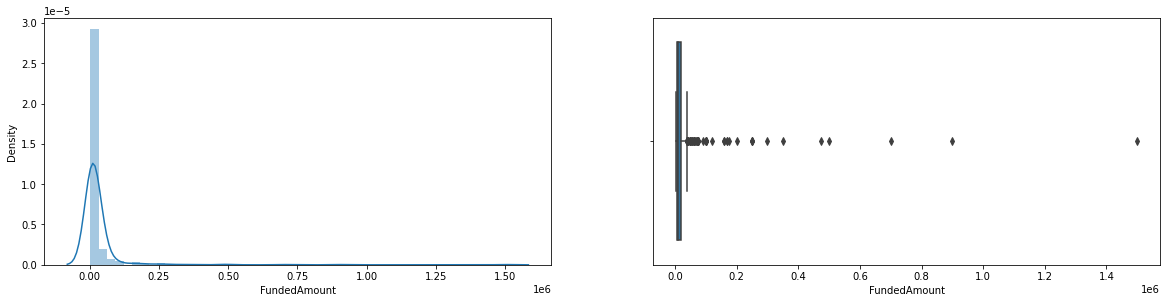

attribute_name : Paybackamount
Description of attribute : 

count    4.840000e+02
mean     4.224218e+04
std      1.361984e+05
min      4.110000e+03
25%      1.043000e+04
50%      1.490000e+04
75%      2.980000e+04
max      2.085000e+06
Name: Paybackamount, dtype: float64 

Value counts of attribute : 

14900.0     51
22350.0     32
10430.0     32
8940.0      29
7450.0      27
            ..
27600.0      1
47950.0      1
31290.0      1
96600.0      1
112500.0     1
Name: Paybackamount, Length: 116, dtype: int64 

Unique number of attribute : 

[  29800.     27600.    149000.     11920.     10430.    322500.
  646000.      4170.     37250.     22350.     21000.      8940.
   16390.     20860.      5215.     13410.     14900.     11175.
    7450.      5960.   1043000.     47680.      4470.     16800.
   44700.     18625.     33810.     25330.     23840.     30140.
   35760.     24310.     55130.     14000.    111750.      9652.22
   27565.     16680.     40975.     81950.    372500.     3

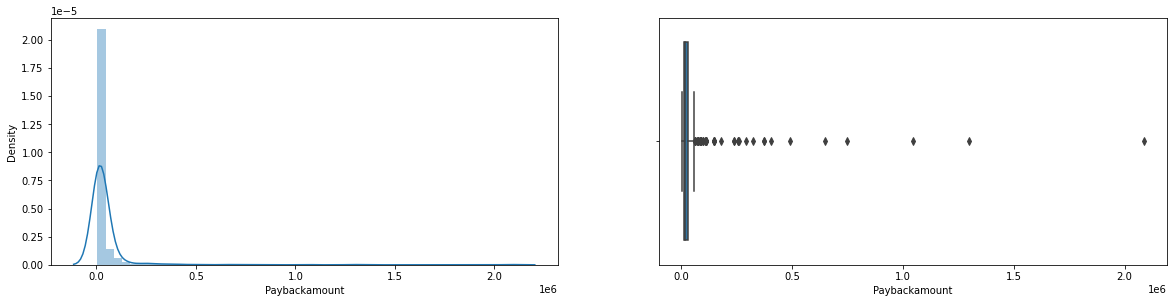

attribute_name : WriteOff_YN
Description of attribute : 

count    484.000000
mean       0.316116
std        0.465440
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: WriteOff_YN, dtype: float64 

Value counts of attribute : 

0.0    331
1.0    153
Name: WriteOff_YN, dtype: int64 

Unique number of attribute : 

[0. 1.] 

Missing values in attribute : 

0 

Missing values in attribute_% : 

0.0 



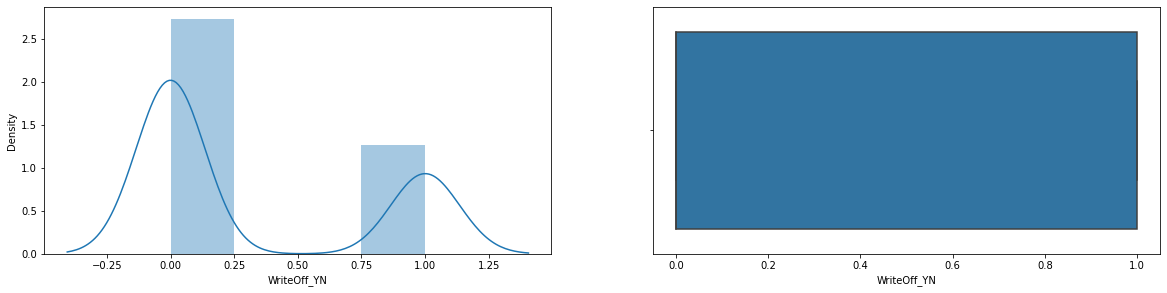

attribute_name : FundedWriteOffAmount_Gross
Description of attribute : 

count       153.000000
mean      10567.496405
std       40502.414096
min           0.000000
25%        1927.200000
50%        3760.510000
75%        8747.500000
max      449342.670000
Name: FundedWriteOffAmount_Gross, dtype: float64 

Value counts of attribute : 

0.00        20
2166.00      1
3277.98      1
3605.40      1
8747.50      1
            ..
8474.45      1
3013.50      1
3484.04      1
11755.24     1
2007.50      1
Name: FundedWriteOffAmount_Gross, Length: 134, dtype: int64 

Unique number of attribute : 

[          nan 2.1660000e+03 2.6542500e+03 1.2775000e+04 5.3775200e+03
 6.4312600e+03 0.0000000e+00 1.2241790e+04 4.4934267e+05 1.9272000e+03
 3.6983500e+03 1.3610000e+04 5.3437500e+03 8.2814000e+02 1.2474090e+04
 3.3201600e+03 9.3247300e+03 3.2091600e+03 3.4040200e+03 1.1110650e+04
 3.9607000e+03 4.0830400e+03 1.9269890e+04 1.9736000e+03 3.2799700e+03
 4.9530000e+04 2.7258900e+04 5.7211400e+03 4.0540

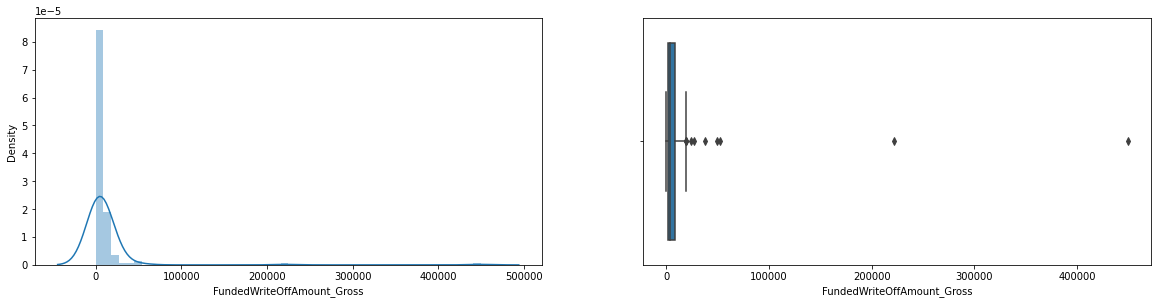

attribute_name : WOGross_AdvanceBalance
Description of attribute : 

count       484.000000
mean      13057.871612
std       46585.803981
min           0.000000
25%           0.000000
50%        4932.250000
75%       10268.410000
max      792342.670000
Name: WOGross_AdvanceBalance, dtype: float64 

Value counts of attribute : 

0.00        123
6555.76       2
5960.00       2
2483.40       2
7335.41       2
           ... 
822.00        1
14060.65      1
6819.11       1
26003.95      1
0.25          1
Name: WOGross_AdvanceBalance, Length: 358, dtype: int64 

Unique number of attribute : 

[1.4900000e+04 9.2478500e+03 1.9866710e+04 5.6764000e+03 1.1579000e+02
 2.0000000e+04 1.8961908e+05 0.0000000e+00 3.3360000e+03 1.4533680e+04
 1.4559280e+04 7.2246200e+03 6.0842500e+03 1.8775000e+04 1.0767520e+04
 5.7737500e+03 8.8681100e+03 8.8000000e+00 5.9583000e+02 3.0914800e+03
 1.1331260e+04 7.1261000e+03 3.6621600e+03 2.6375000e+02 1.8873500e+03
 3.6257800e+03 1.9101790e+04 7.9234267e+05 3.39720

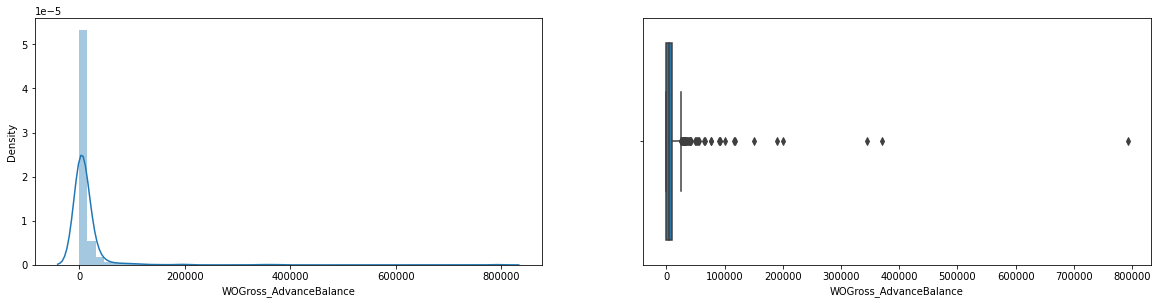

attribute_name : NetWO
Description of attribute : 

count       114.000000
mean       8077.030877
std       21889.342755
min           0.000000
25%         712.420000
50%        3635.540000
75%        8872.400000
max      221726.190000
Name: NetWO, dtype: float64 

Value counts of attribute : 

0.00        23
2166.00      1
6546.40      1
710.50       1
7741.47      1
            ..
1248.18      1
8474.45      1
6088.75      1
7528.30      1
10905.40     1
Name: NetWO, Length: 92, dtype: int64 

Unique number of attribute : 

[          nan 2.1660000e+03 2.6542500e+03 1.2775000e+04 6.4312600e+03
 0.0000000e+00 1.2241790e+04 1.9272000e+03 3.6983500e+03 1.3610000e+04
 5.3437500e+03 9.3247300e+03 3.4040200e+03 1.1110650e+04 4.0830400e+03
 1.9269890e+04 1.7736000e+03 3.2525300e+03 4.8312200e+04 5.7211400e+03
 8.6755600e+03 6.8080000e+03 1.5076250e+04 1.1657600e+03 9.4220700e+03
 5.9570000e+03 1.9770000e+03 7.5283000e+03 6.0887500e+03 8.4744500e+03
 1.2481800e+03 3.6656800e+03 9.7722700e+03

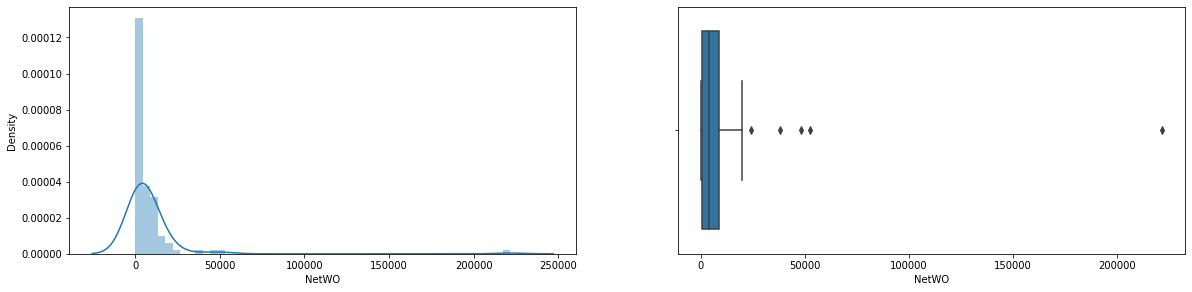

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    482.000000
mean       0.527835
std        1.603846
min        0.000000
25%        0.000000
50%        0.000000
75%        0.250000
max       14.250000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     355
0.250000      23
0.500000      16
0.750000      11
2.000000       8
0.333333       7
1.000000       7
1.500000       5
1.250000       5
4.000000       4
1.750000       4
3.750000       4
0.666666       4
3.000000       3
3.250000       2
2.666666       2
1.666666       2
6.333333       2
4.750000       2
1.333333       1
4.250000       1
13.500000      1
2.250000       1
2.500000       1
5.333333       1
6.000000       1
2.333333       1
7.000000       1
14.250000      1
11.666666      1
5.000000       1
3.333333       1
7.250000       1
12.000000      1
8.333333       1
Name: Avg_ReturnItemdays, dtype: int64 

Unique number of attribute : 

[ 0.        1.25      4.        4.7

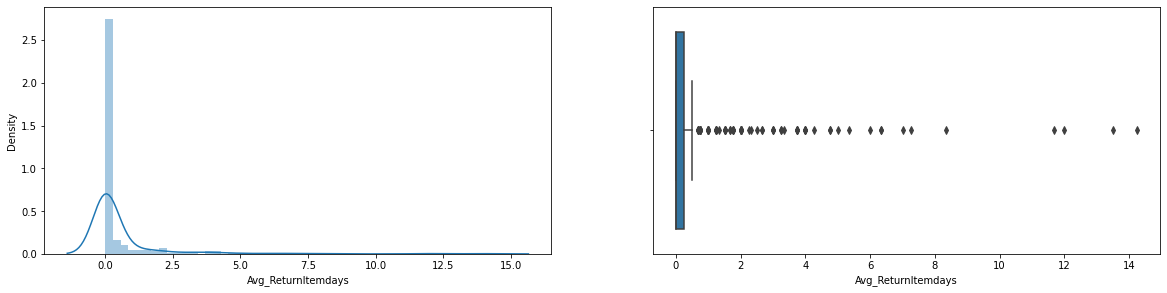

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    234.000000
mean       1.222222
std        2.934510
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       20.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     166
2.0      20
1.0      15
3.0       7
4.0       6
6.0       4
5.0       4
15.0      3
10.0      2
7.0       2
20.0      1
14.0      1
12.0      1
9.0       1
8.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[nan  2.  0. 10.  3.  1. 20.  4.  6. 15.  5. 14.  7. 12.  9.  8.] 

Missing values in attribute : 

250 

Missing values in attribute_% : 

51.652892561983464 



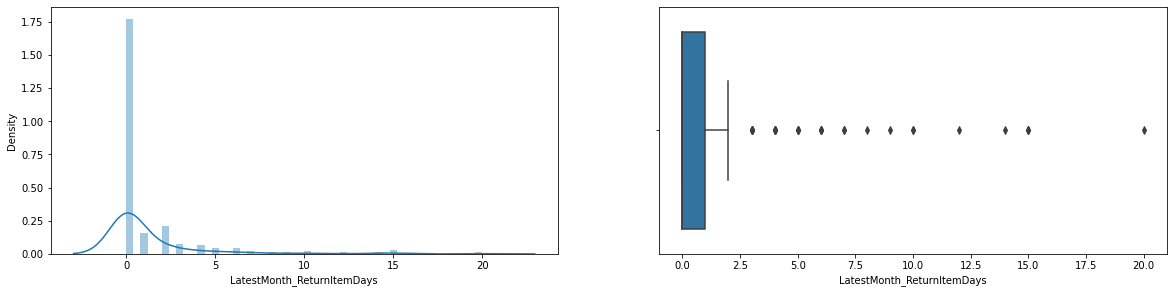

attribute_name : PctChangeInReveune
Description of attribute : 

count    441.000000
mean      -0.133584
std        2.744133
min      -56.591706
25%       -0.124009
50%        0.040707
75%        0.248093
max        0.958528
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

-0.334307    1
 0.784577    1
 0.434519    1
 0.633745    1
 0.318963    1
            ..
-0.007364    1
-0.585106    1
 0.186348    1
-0.057709    1
-0.691394    1
Name: PctChangeInReveune, Length: 441, dtype: int64 

Unique number of attribute : 

[-3.34307280e-01 -7.30461561e-01 -1.46202175e+00  4.25028646e-01
 -7.18830553e-01             nan  1.93250305e-01  7.07939550e-01
  4.21820564e-01  8.84611695e-02 -2.25019958e-02 -6.19914297e-01
 -1.21785078e-01  9.40932912e-01 -1.32054562e-01 -1.28576522e-01
  1.78738734e-01  1.10247051e-01  4.05795330e-01  1.87285443e-01
  1.72540599e-01  4.56016787e-01  2.81217495e-01  4.41643241e-02
  2.75539477e-01 -1.65956167e-01 -1.56295657e-01 -4.10219631e-

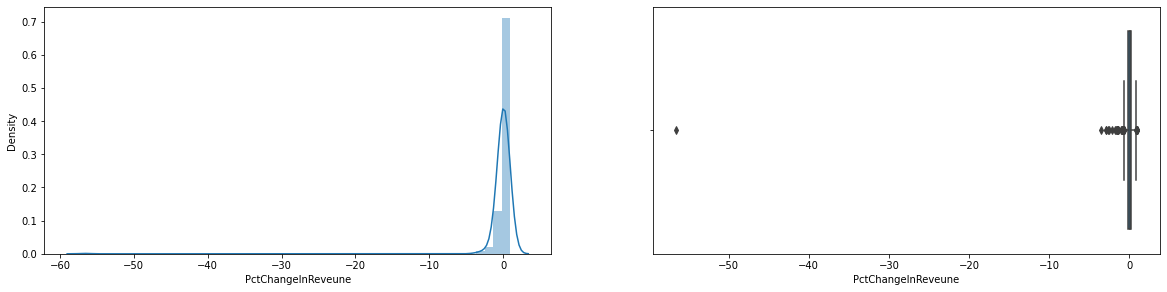

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    482.000000
mean       0.250179
std        0.512301
min       -0.129560
25%        0.056243
50%        0.118964
75%        0.229658
max        5.978911
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.232447    1
0.109521    1
0.217753    1
0.229624    1
0.227383    1
           ..
0.026612    1
1.515946    1
0.039959    1
0.196388    1
0.062757    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 482, dtype: int64 

Unique number of attribute : 

[ 2.32447394e-01  9.71874871e-01  1.10073210e-02  1.15913770e-01
  1.55118835e-02  2.36831795e-01 -3.46520630e-02  2.98849465e-01
  5.62170897e-01 -6.26860461e-03  1.29737854e-02  3.75953363e-02
  1.19859755e-01  5.08470618e-02  3.49000996e-02  8.99685702e-02
  1.39650193e-01  4.17910790e-02  2.70432987e-01  3.48291434e-01
  2.00580536e-02  8.81328481e-02  9.02852720e-02  1.84666247e-01
  2.53121713e-02

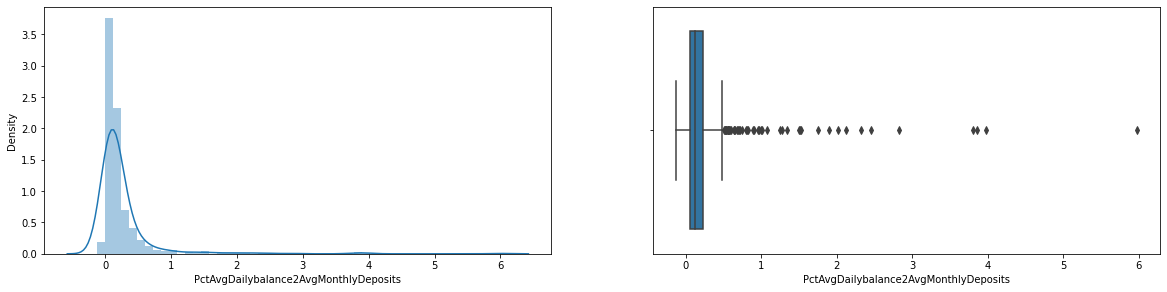

In [51]:
for col in numerical_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [52]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

NetWO                                    76.446281
FundedWriteOffAmount_Gross               68.388430
LatestMonth_ReturnItemDays               51.652893
PctChangeInReveune                        8.884298
Renewal_PreviousAvgMonthRevenue           8.264463
Renewal_PreviousAvgDailyBalance           8.264463
Renewal_PreviousPaidPercentageOfRTR       2.272727
Renewal_PreviousPace                      2.066116
Credit_Score__c                           1.859504
PctAvgDailybalance2AvgMonthlyDeposits     0.413223
Avg_ReturnItemdays                        0.413223
AvgDailybalance                           0.413223
AvgMonthlydeposits                        0.413223
BankStatement_MA_OverdraftDays            0.413223
BankStatement_MA_NumReturnItems           0.413223
OpportunityID                             0.000000
WOGross_AdvanceBalance                    0.000000
Paybackamount                             0.000000
WriteOff_YN                               0.000000
Time_in_Business__c            

# Missing Values

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    234.000000
mean       1.222222
std        2.934510
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       20.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     166
2.0      20
1.0      15
3.0       7
4.0       6
6.0       4
5.0       4
15.0      3
10.0      2
7.0       2
20.0      1
14.0      1
12.0      1
9.0       1
8.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[nan  2.  0. 10.  3.  1. 20.  4.  6. 15.  5. 14.  7. 12.  9.  8.] 

Missing values in attribute : 

250 

Missing values in attribute_% : 

51.652892561983464 



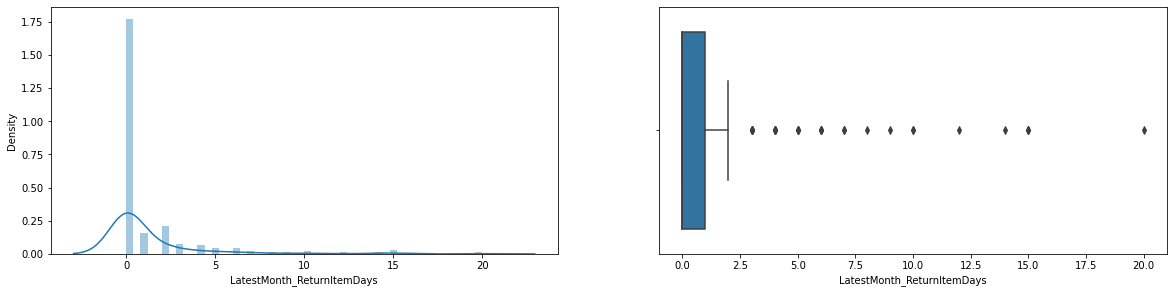

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    473.000000
mean       0.744101
std        0.274717
min        0.070000
25%        0.530000
50%        0.650000
75%        0.950000
max        2.130000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

0.52    31
1.00    31
0.51    24
0.56    21
0.60    19
        ..
1.38     1
0.47     1
0.07     1
1.40     1
1.58     1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 103, dtype: int64 

Unique number of attribute : 

[0.8  0.68 1.09  nan 0.99 0.42 0.47 0.5  0.55 1.   1.38 0.69 0.78 0.9
 1.03 1.18 0.87 0.81 0.54 0.6  0.73 0.56 0.98 0.53 0.15 0.24 0.63 0.7
 0.67 0.95 1.26 0.92 1.05 1.15 1.17 1.43 2.13 2.   1.2  0.65 0.49 1.27
 1.13 0.86 0.58 0.93 0.52 1.33 1.25 0.84 0.91 0.74 0.89 1.02 0.75 0.76
 0.64 1.01 0.51 1.22 1.23 0.82 1.1  0.94 0.61 0.83 0.97 0.28 0.77 0.62
 0.43 1.35 1.46 0.39 0.88 0.57 0.35 0.85 0.07 0.59 0.66 1.4  0.79 0.37
 1.08 0.96 1.16 1.04 

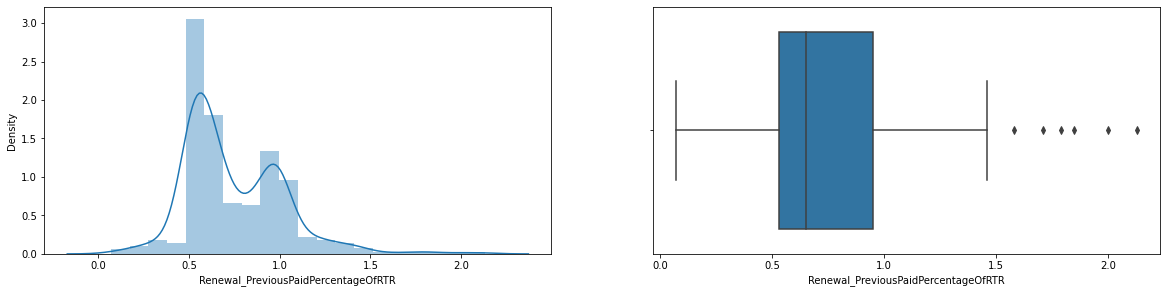

attribute_name : PctChangeInReveune
Description of attribute : 

count    441.000000
mean      -0.133584
std        2.744133
min      -56.591706
25%       -0.124009
50%        0.040707
75%        0.248093
max        0.958528
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

-0.334307    1
 0.784577    1
 0.434519    1
 0.633745    1
 0.318963    1
            ..
-0.007364    1
-0.585106    1
 0.186348    1
-0.057709    1
-0.691394    1
Name: PctChangeInReveune, Length: 441, dtype: int64 

Unique number of attribute : 

[-3.34307280e-01 -7.30461561e-01 -1.46202175e+00  4.25028646e-01
 -7.18830553e-01             nan  1.93250305e-01  7.07939550e-01
  4.21820564e-01  8.84611695e-02 -2.25019958e-02 -6.19914297e-01
 -1.21785078e-01  9.40932912e-01 -1.32054562e-01 -1.28576522e-01
  1.78738734e-01  1.10247051e-01  4.05795330e-01  1.87285443e-01
  1.72540599e-01  4.56016787e-01  2.81217495e-01  4.41643241e-02
  2.75539477e-01 -1.65956167e-01 -1.56295657e-01 -4.10219631e-

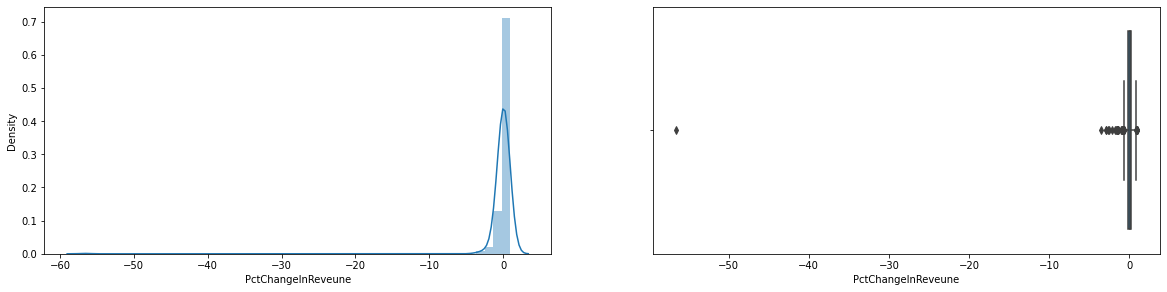

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count       444.000000
mean      12231.393356
std       34489.529131
min        -686.670000
25%        1647.767500
50%        3501.585000
75%        7765.427500
max      376602.010000
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

6899.89     1
12346.05    1
1225.59     1
1680.84     1
2539.48     1
           ..
7780.21     1
30784.87    1
3496.14     1
2252.43     1
1486.01     1
Name: Renewal_PreviousAvgDailyBalance, Length: 444, dtype: int64 

Unique number of attribute : 

[ 6.8998900e+03  1.6924830e+04  5.3529790e+04  4.7587700e+03
  1.7391700e+03            nan  5.5750860e+04  1.9980200e+03
  3.4449000e+03  5.3322000e+02  6.0676000e+02  1.8841800e+03
  2.7125900e+03  7.5840500e+03  1.7435000e+03  7.4843300e+03
  1.4742000e+03  3.5796600e+03  6.4314000e+02  4.8216000e+02
  1.2294900e+03  1.0045800e+03  2.0314900e+03  5.2184000e+02
  5.8952000e+03  6.5767500e+03  1.

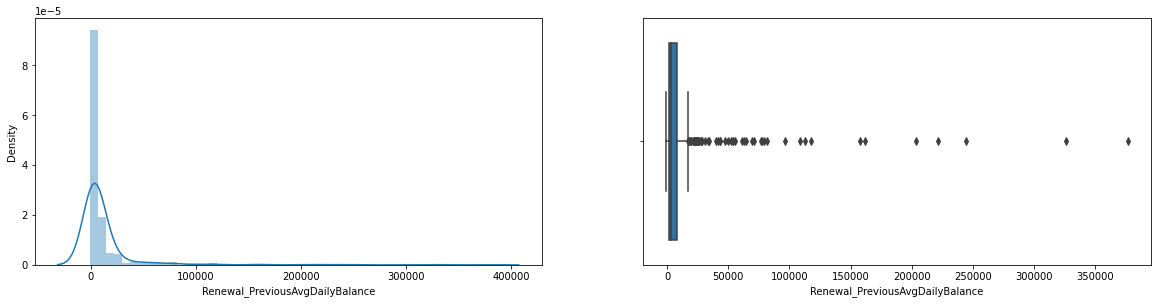

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    4.440000e+02
mean     6.182553e+04
std      1.823386e+05
min      6.000000e+02
25%      1.517303e+04
50%      2.524420e+04
75%      4.694799e+04
max      3.162730e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

56142.61     1
32638.30     1
32772.59     1
11795.37     1
14478.08     1
            ..
21142.16     1
108976.26    1
29514.42     1
9983.37      1
16874.02     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 444, dtype: int64 

Unique number of attribute : 

[5.61426100e+04 2.76245000e+04 3.16273000e+06 2.08540500e+04
 2.17980100e+04            nan 5.24545360e+05 1.69161500e+04
 1.54920000e+04 2.89837900e+04 5.41909800e+04 3.79464600e+04
 2.30538500e+04 9.28840000e+02 1.62623500e+04 2.38971000e+04
 3.22575000e+04 2.10226200e+04 3.15079700e+04 4.43276300e+04
 1.23127200e+04 1.16240400e+04 4.68524000e+03 2.88614200e+04
 7.16703000e+03 2.00890300e+04 

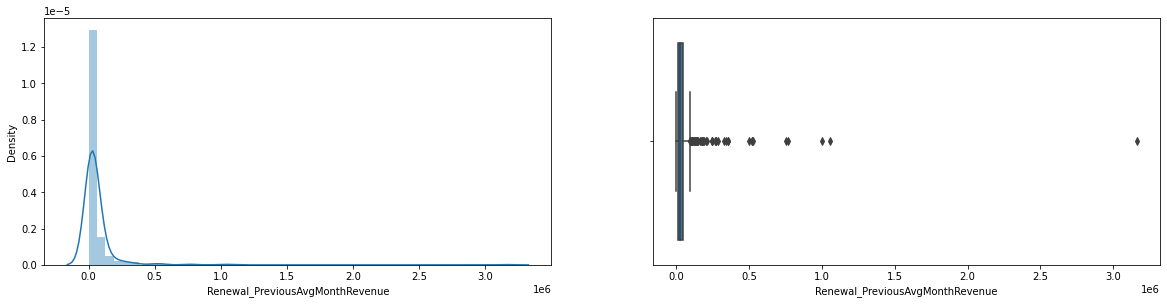

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    482.000000
mean       0.250179
std        0.512301
min       -0.129560
25%        0.056243
50%        0.118964
75%        0.229658
max        5.978911
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.232447    1
0.109521    1
0.217753    1
0.229624    1
0.227383    1
           ..
0.026612    1
1.515946    1
0.039959    1
0.196388    1
0.062757    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 482, dtype: int64 

Unique number of attribute : 

[ 2.32447394e-01  9.71874871e-01  1.10073210e-02  1.15913770e-01
  1.55118835e-02  2.36831795e-01 -3.46520630e-02  2.98849465e-01
  5.62170897e-01 -6.26860461e-03  1.29737854e-02  3.75953363e-02
  1.19859755e-01  5.08470618e-02  3.49000996e-02  8.99685702e-02
  1.39650193e-01  4.17910790e-02  2.70432987e-01  3.48291434e-01
  2.00580536e-02  8.81328481e-02  9.02852720e-02  1.84666247e-01
  2.53121713e-02

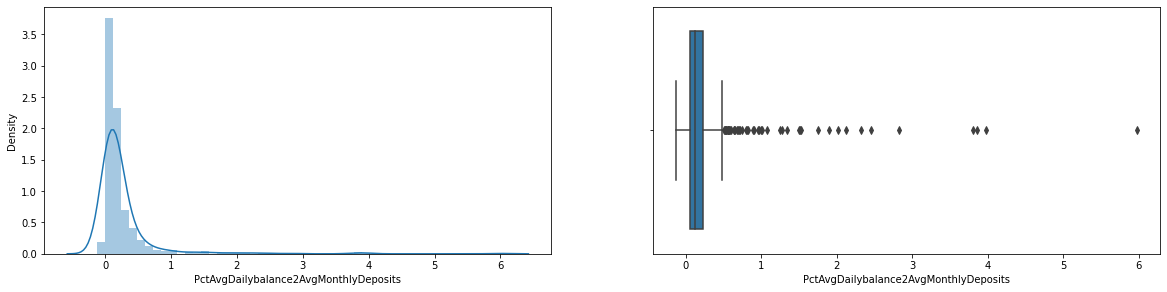

attribute_name : BankStatement_MA_OverdraftDays
Description of attribute : 

count    482.000000
mean       1.940422
std        3.102803
min        0.000000
25%        0.000000
50%        0.500000
75%        2.500000
max       17.333333
Name: BankStatement_MA_OverdraftDays, dtype: float64 

Value counts of attribute : 

0.000000     179
0.250000      31
0.333333      24
1.000000      19
2.000000      16
            ... 
11.666666      1
11.333333      1
7.333333       1
8.666666       1
14.333333      1
Name: BankStatement_MA_OverdraftDays, Length: 69, dtype: int64 

Unique number of attribute : 

[ 0.        0.666666 10.        0.333333  8.666666  0.25     15.5
  1.        5.333333  3.333333  2.        7.333333  2.75      6.
  4.5       1.75      0.5       1.25      2.25      5.25      1.5
  9.666666 11.       11.333333 11.666666 12.        2.5       6.333333
  3.        5.666666  6.75      2.666666 15.75      5.5       6.25
  4.        4.666666  4.75     10.5       0.75     17.333333

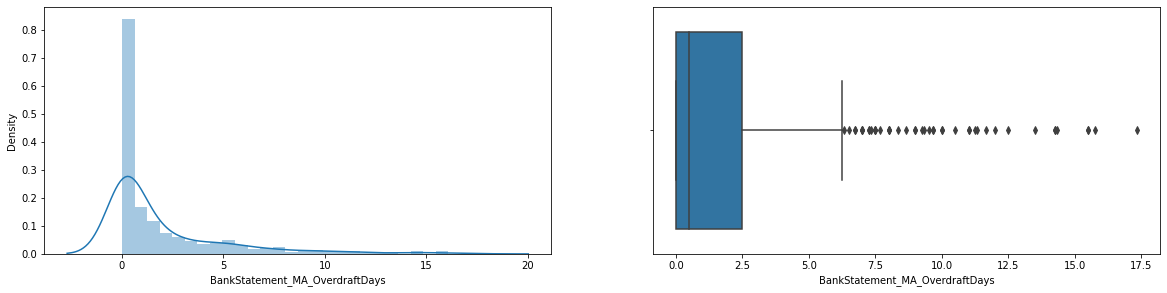

attribute_name : AvgMonthlydeposits
Description of attribute : 

count    4.820000e+02
mean     6.944182e+04
std      1.675961e+05
min      1.220150e+02
25%      1.630252e+04
50%      2.941181e+04
75%      5.581369e+04
max      2.290947e+06
Name: AvgMonthlydeposits, dtype: float64 

Value counts of attribute : 

42076.225000     1
9179.610000      1
57955.242500     1
32205.327500     1
104793.380000    1
                ..
30043.652500     1
11530.752500     1
21609.733333     1
13396.870000     1
9976.396666      1
Name: AvgMonthlydeposits, Length: 482, dtype: int64 

Unique number of attribute : 

[4.20762250e+04 1.59636600e+04 1.28460685e+06 3.62697233e+04
 1.26818850e+04 1.75110987e+05 6.50195917e+05 5.79200267e+04
 2.67944500e+04 3.17965450e+04 5.29984100e+04 2.34249833e+04
 1.51250125e+04 2.05510367e+04 1.57251700e+04 1.43653450e+04
 2.11745467e+04 3.92780000e+04 2.36274800e+04 5.30254500e+04
 5.45426825e+04 1.48801475e+04 2.13683800e+04 6.51829500e+03
 3.01949550e+04 9.89292000

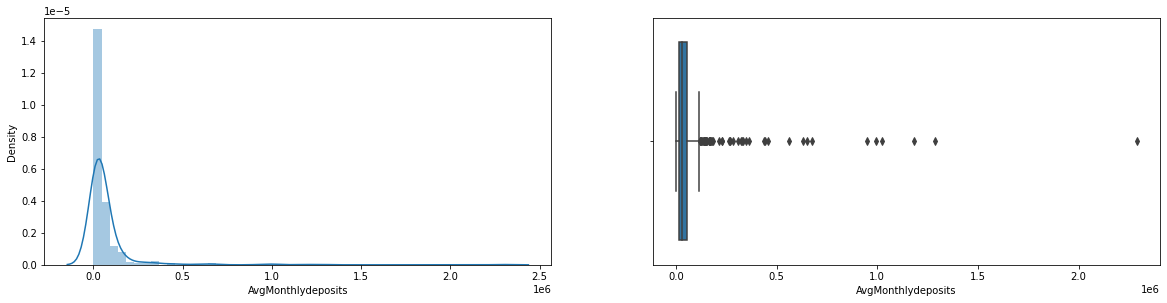

attribute_name : BankStatement_MA_NumReturnItems
Description of attribute : 

count    482.000000
mean       1.119467
std        3.170759
min        0.000000
25%        0.000000
50%        0.000000
75%        0.666666
max       38.500000
Name: BankStatement_MA_NumReturnItems, dtype: float64 

Value counts of attribute : 

0.000000     311
0.250000      20
0.500000      17
0.750000      12
1.500000      10
2.500000       8
2.000000       8
0.333333       8
0.666666       8
1.000000       6
1.250000       5
2.666666       4
4.000000       4
1.750000       4
4.500000       3
1.333333       3
5.000000       3
7.000000       3
3.750000       2
2.250000       2
7.500000       2
3.666666       2
9.000000       2
4.250000       2
6.000000       2
7.750000       2
2.750000       2
1.666666       2
3.000000       2
8.666666       1
11.333333      1
38.500000      1
3.500000       1
6.250000       1
10.333333      1
6.500000       1
8.250000       1
2.333333       1
12.333333      1
13.000000    

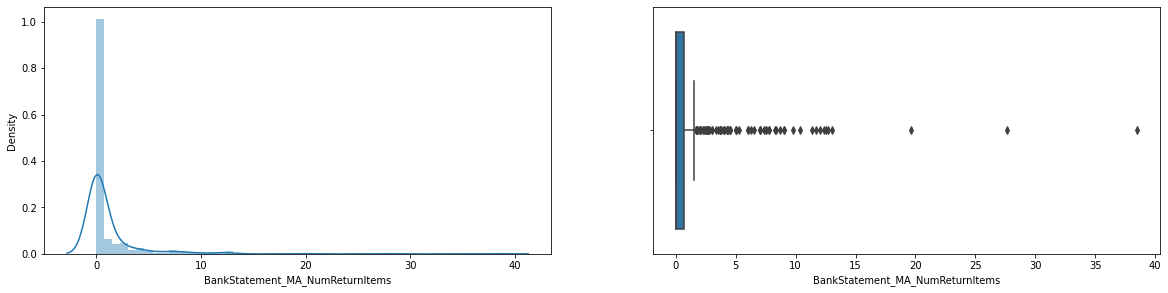

attribute_name : AvgDailybalance
Description of attribute : 

count       482.000000
mean      11963.588473
std       29532.052924
min      -22530.626666
25%        1597.313541
50%        3522.600000
75%        9851.254375
max      272502.616666
Name: AvgDailybalance, dtype: float64 

Value counts of attribute : 

2652.175000     2
9780.505000     1
615.427500      1
12619.912500    1
7395.110000     1
               ..
799.512500      1
17480.002500    1
863.500000      1
2630.976666     1
626.090000      1
Name: AvgDailybalance, Length: 481, dtype: int64 

Unique number of attribute : 

[ 9.78050500e+03  1.55146767e+04  1.41400800e+04  4.20415667e+03
  1.96717500e+02  4.14718467e+04 -2.25306267e+04  1.73093667e+04
  1.50630575e+04 -1.99322500e+02  6.87586666e+02  8.80670000e+02
  1.81288000e+03  1.04496333e+03  5.48806666e+02  1.29242500e+03
  2.95703333e+03  1.64147000e+03  6.38965333e+03  1.84683067e+04
  1.09402250e+03  1.31142500e+03  1.92924667e+03  1.20370750e+03
  7.64300000e+

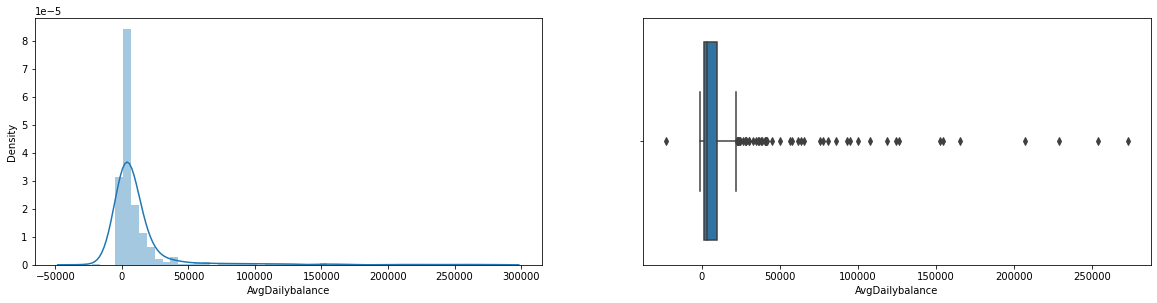

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    482.000000
mean       0.527835
std        1.603846
min        0.000000
25%        0.000000
50%        0.000000
75%        0.250000
max       14.250000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     355
0.250000      23
0.500000      16
0.750000      11
2.000000       8
0.333333       7
1.000000       7
1.500000       5
1.250000       5
4.000000       4
1.750000       4
3.750000       4
0.666666       4
3.000000       3
3.250000       2
2.666666       2
1.666666       2
6.333333       2
4.750000       2
1.333333       1
4.250000       1
13.500000      1
2.250000       1
2.500000       1
5.333333       1
6.000000       1
2.333333       1
7.000000       1
14.250000      1
11.666666      1
5.000000       1
3.333333       1
7.250000       1
12.000000      1
8.333333       1
Name: Avg_ReturnItemdays, dtype: int64 

Unique number of attribute : 

[ 0.        1.25      4.        4.7

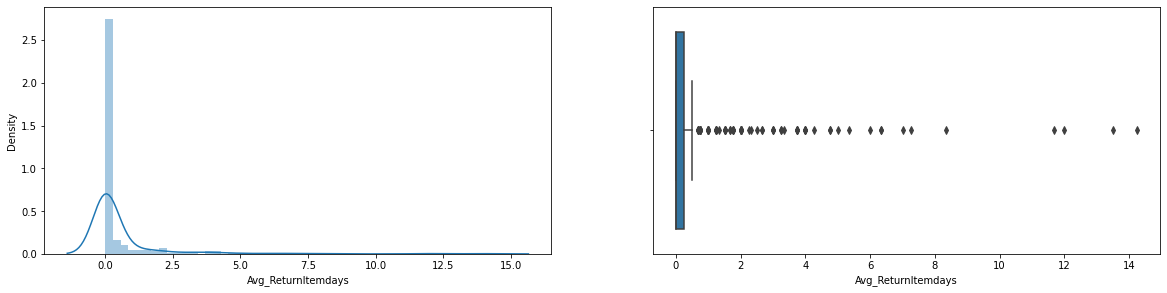

attribute_name : Credit_Score__c
Description of attribute : 

count    475.000000
mean     554.882105
std      162.383651
min        0.000000
25%      544.000000
50%      589.000000
75%      633.500000
max      802.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      25
1.0       8
628.0     7
612.0     7
590.0     6
         ..
531.0     1
802.0     1
596.0     1
505.0     1
711.0     1
Name: Credit_Score__c, Length: 196, dtype: int64 

Unique number of attribute : 

[714.  nan 665.   0. 468. 647. 710. 567. 663. 576. 564. 490. 546. 653.
 511. 586. 606. 544. 553. 581. 585. 550. 560. 547. 529. 633. 575. 611.
 667. 526. 598. 608. 652. 549. 592. 501. 673. 602. 609. 661. 500. 622.
 635. 571. 610. 566. 615. 534. 551. 472. 646. 577. 509. 556. 658. 599.
 624. 554. 659. 589.   1. 705. 669. 668. 573. 563. 480. 612. 543. 761.
 678. 525. 559. 497. 670. 545. 603. 706. 741. 539. 632. 604. 645. 674.
 666. 594. 587. 655. 482. 593. 654. 579. 656. 697. 572. 542. 477. 53

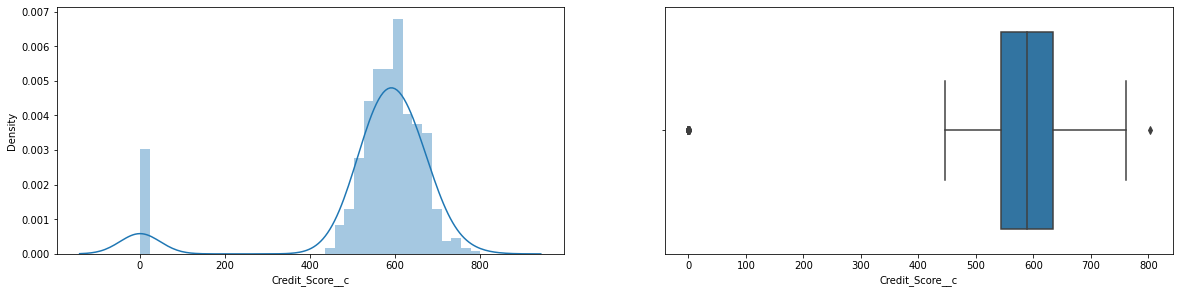

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    474.000000
mean      98.468207
std        5.809048
min       54.550000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    422
95.23       1
59.05       1
79.50       1
83.33       1
75.11       1
91.65       1
95.65       1
95.96       1
96.30       1
69.03       1
86.05       1
86.79       1
97.44       1
95.27       1
91.89       1
72.90       1
94.38       1
76.32       1
98.33       1
54.55       1
77.26       1
98.48       1
93.34       1
90.81       1
95.93       1
95.55       1
98.82       1
90.00       1
98.59       1
92.16       1
69.32       1
91.18       1
69.84       1
88.89       1
93.75       1
84.45       1
85.00       1
91.16       1
93.33       1
90.40       1
72.64       1
93.94       1
87.80       1
82.35       1
86.08       1
95.37       1
60.04       1
70.59       1
99.34       

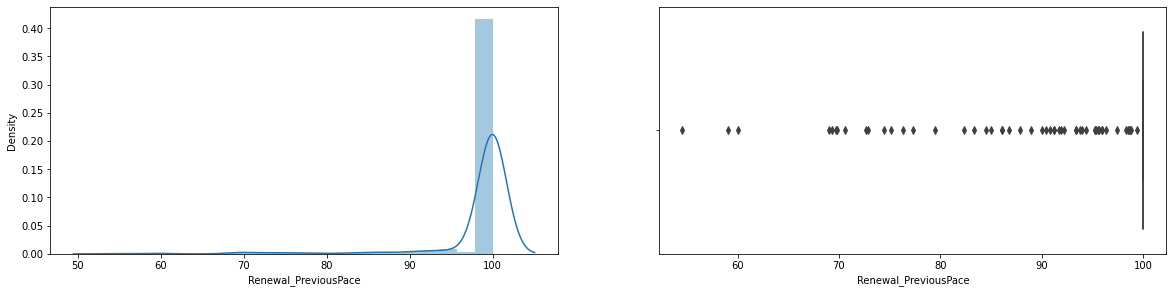

In [53]:
missing_attributes = ['LatestMonth_ReturnItemDays',
                      'Renewal_PreviousPaidPercentageOfRTR',
                      'PctChangeInReveune',
                      'Renewal_PreviousAvgDailyBalance',         
                      'Renewal_PreviousAvgMonthRevenue', 
                      'PctAvgDailybalance2AvgMonthlyDeposits',   
                      'BankStatement_MA_OverdraftDays',           
                      'AvgMonthlydeposits',        
                      'BankStatement_MA_NumReturnItems',          
                      'AvgDailybalance',                         
                      'Avg_ReturnItemdays',                       
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [54]:
data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(), inplace = True)
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(), inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(), inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(), inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(), inplace = True)
data['BankStatement_MA_OverdraftDays'].fillna(data['BankStatement_MA_OverdraftDays'].median(), inplace = True)
data['AvgMonthlydeposits'].fillna(data['AvgMonthlydeposits'].median(), inplace = True)
data['BankStatement_MA_NumReturnItems'].fillna(data['BankStatement_MA_NumReturnItems'].median(), inplace = True)
data['AvgDailybalance'].fillna(data['AvgDailybalance'].median(), inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(), inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)

In [55]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

596.2918552036199

In [56]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

In [57]:
data['NetWO'].fillna(0,inplace = True)
data['FundedWriteOffAmount_Gross'].fillna(0,inplace = True)

In [58]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID                            0.0
HB_with_LCF_Payment__c                   0.0
PctAvgDailybalance2AvgMonthlyDeposits    0.0
PctChangeInReveune                       0.0
LatestMonth_ReturnItemDays               0.0
Avg_ReturnItemdays                       0.0
NetWO                                    0.0
WOGross_AdvanceBalance                   0.0
FundedWriteOffAmount_Gross               0.0
WriteOff_YN                              0.0
Paybackamount                            0.0
FundedAmount                             0.0
AvgDailybalance                          0.0
AvgMonthlydeposits                       0.0
Time_in_Business__c                      0.0
Renewal_PreviousPace                     0.0
Credit_Score__c                          0.0
BankStatement_MA_NumReturnItems          0.0
BankStatement_MA_OverdraftDays           0.0
NumberOfBankStatements                   0.0
Renewal_TwoWeekBounces                   0.0
Renewal_PreviousAvgDailyBalance          0.0
Renewal_Pr

In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_val_data_after_eda.xlsx',index = False)